In [1]:
setwd('/import/DB/fel/BJTC-204')

In [2]:
load('bulk2.rda')

In [3]:
ls()

[1] "groupinfo" "nmfinput"

In [4]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [5]:
groupinfo1 = groupinfo %>%  tibble::rownames_to_column('sample')

In [6]:
#violin = merge(groupinfo,expr,by = 'sample') %>%  tibble::column_to_rownames(.,'sample')

In [7]:
expr1 = nmfinput %>% tibble::rownames_to_column(.,'sample')

In [8]:
write.table(expr1,file  = 'bulk.expr.txt',sep = '\t',quote =F,row.names = F)

In [9]:
expr1

sample,GSM1124359,GSM1124360,GSM1124361,GSM1124362,GSM1124363,GSM1124364,GSM1124366,GSM1124367,GSM1124369,...,GSM1124506,GSM1124507,GSM1124508,GSM1124509,GSM1124510,GSM1124511,GSM1124512,GSM1124514,GSM1124515,GSM1124517
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPE65,4.327776,4.263792,4.331998,4.261061,4.395812,4.337443,4.291779,4.411711,4.233303,...,4.161806,4.250814,4.225242,4.215037,4.202389,4.324452,4.297928,4.276099,4.235047,4.358084
DRD3,4.560743,4.558613,4.598938,4.648340,4.668019,4.540123,4.561194,4.664942,4.511990,...,4.704619,4.460425,4.530692,4.532424,4.517512,4.787102,4.737589,4.825159,4.692147,4.783388
MC3R,4.642471,4.566948,4.588420,4.604714,4.626034,4.780849,4.488626,4.458523,4.459011,...,4.567379,4.657253,4.562783,4.497785,4.490201,4.707864,4.703261,4.731807,4.684853,4.712428
RELB,5.636162,5.307783,5.734827,5.625266,5.953483,5.645961,5.675045,5.414804,5.652925,...,5.557146,5.610307,5.602492,5.585793,5.340806,5.932335,5.994645,5.838986,5.881056,5.823487
PRF1,5.388139,5.183665,5.509261,5.327468,5.512598,5.281015,5.512862,5.353929,5.294968,...,5.146339,5.174797,4.992580,5.298865,5.110595,5.492745,5.307725,5.445255,5.386823,5.311467


In [10]:
dim(expr1)

[1]   5 119

In [11]:
dim(groupinfo1)

[1] 118   2

In [12]:
head(groupinfo1,2)

,sample,group
,<chr>,<fct>
1,GSM1124359,2
2,GSM1124360,2


In [13]:
write.table(groupinfo1,file  = 'bulk.expr.group.txt',sep = '\t',quote =F,row.names = F)

Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.3     v purrr   1.0.1
v tibble  3.2.1     v stringr 1.5.0
v tidyr   1.3.0     v forcats 1.0.0
v readr   2.1.4     
Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'ggpubr' was built under R v

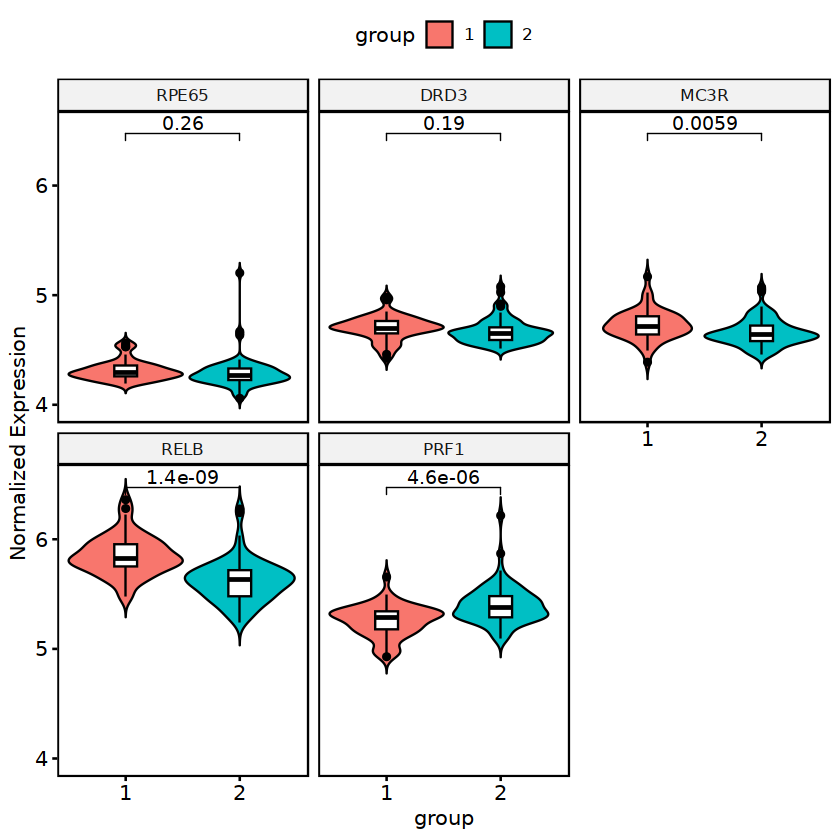

In [14]:
violinplot = function(
    expr = expr,
    gene = gene,
    groupinfo = groupinfo
){

library(dplyr)
library(tidyverse)
library(ggpubr)
count = read.table(expr,header =T,sep = '\t')
groupinfo = read.table(groupinfo,row.names = 1,sep = '\t',header =T)
colnames(count)[1] = 'Gene'
count = count[!duplicated(count$Gene),]

rownames(count) = count[,1]
count = count[,-1]
count  = count[gene,]
count.t = as.data.frame(t(count))
    head(count.t,2)
count.t$group = groupinfo$group
    if (length(unique(count.t$group)) ==3){
    my_comparisons <- list( c(unique(count.t$group)[1], unique(count.t$group)[2]),
                           c(unique(count.t$group)[1], unique(count.t$group)[3]),
                          c(unique(count.t$group)[2], unique(count.t$group)[3]))##分组设定
    e<-count.t %>% 
      dplyr::filter(group %in% unique(count.t$group) ) %>% #筛选行
      ggviolin(x = "group", y = c(colnames(count.t)[1:dim(count.t)[2]-1]), fill = "group",
               combine = T,
             #palette = c("#00AFBB", "#E7B800", "#FC4E07"),##颜色设置
             ylab="Normalized Expression",
             add = "boxplot", add.params = list(fill = "white"))
    p =  e+stat_compare_means(method = "t.test",
                         #label = "p.signif",##星号设置
                         comparisons = my_comparisons)

    print(p)
    }else if(length(unique(count.t$group)) == 2){
    my_comparisons <- list( 
                          c(unique(count.t$group)[1], unique(count.t$group)[2]))##分组设定
    e<-count.t %>% 
      dplyr::filter(group %in% unique(count.t$group) ) %>% #筛选行
      ggviolin(x = "group", y = c(colnames(count.t)[1:dim(count.t)[2]-1]), fill = "group",
               combine = T,
             #palette = c("#00AFBB", "#E7B800", "#FC4E07"),##颜色设置
             ylab="Normalized Expression",
             add = "boxplot", add.params = list(fill = "white"))
    p =  e+stat_compare_means(method = "t.test",
                         #label = "p.signif",##星号设置
                         comparisons = my_comparisons)
    }

if (length(gene) > 6){
    ggsave(file = 'violin.pdf',width = 9,height = 9)
}else{
    ggsave(file = 'violin.pdf')
}
p
#return(count.t)
}

count = './bulk.expr.txt'
gene = c('RPE65' ,'DRD3', 'MC3R','RELB',  'PRF1')
group = './bulk.expr.group.txt'
violinplot(count,gene,group)